# Answering Business Questions using SQL

### Creating Helper Functions

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

database = "chinook.db"

In [3]:
#run_query: takes SQL query as an arguement & 
#returns pandas dataframe of that query
def run_query(q):
    with sqlite3.connect(database) as conn:
        return pd.read_sql(q, conn)

#run_command: run SQL quereies that don't return tables
def run_command(c):
    with sqlite3.connect(databsse) as conn:
        conn.isolation_level = None
        conn.execute(c)

#show_tables: shows a list of all tables and views in the database
def show_tables():
    query = '''
    SELECT
        name,
        type
    FROM sqlite_master
    WHERE type in("table","view")'''
    return run_query(query)

In [4]:
show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


### Selecting Albums to Add to the Store

In [5]:
us_data = '''
SELECT *
FROM customer c
INNER JOIN invoice i ON i.customer_id = c.customer_id
WHERE country = "USA"
'''

In [6]:
run_query(us_data)

,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,...,support_rep_id,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
0,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,...,4,66,16,2017-04-29 00:00:00,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,6.93
1,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,...,4,75,16,2017-05-24 00:00:00,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,3.96
2,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,...,4,257,16,2018-08-01 00:00:00,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,10.89
3,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,...,4,268,16,2018-08-23 00:00:00,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,10.89
4,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,...,4,289,16,2018-11-06 00:00:00,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,6.93
5,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,...,4,389,16,2019-07-18 00:00:00,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,16.83
6,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,...,4,551,16,2020-08-18 00:00:00,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,10.89
7,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,...,4,591,16,2020-11-20 00:00:00,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,6.93
8,17,Jack,Smith,Microsoft Corporation,1 Microsoft Way,Redmond,WA,USA,98052-8300,+1 (425) 882-8080,...,5,98,17,2017-07-23 00:00:00,1 Microsoft Way,Redmond,WA,USA,98052-8300,9.90
9,17,Jack,Smith,Microsoft Corporation,1 Microsoft Way,Redmond,WA,USA,98052-8300,+1 (425) 882-8080,...,5,128,17,2017-10-12 00:00:00,1 Microsoft Way,Redmond,WA,USA,98052-8300,6.93


In [7]:
track_data = '''
SELECT 
    g.name genre,
    t.name track
FROM track t
LEFT JOIN genre g ON g.genre_id = t.genre_id
'''

In [8]:
run_query(track_data)

,genre,track
0,Rock,For Those About To Rock (We Salute You)
1,Rock,Balls to the Wall
2,Rock,Fast As a Shark
3,Rock,Restless and Wild
4,Rock,Princess of the Dawn
5,Rock,Put The Finger On You
6,Rock,Let's Get It Up
7,Rock,Inject The Venom
8,Rock,Snowballed
9,Rock,Evil Walks


In [9]:
usa_popular_genre = '''
WITH 
    us_tracks AS
        (
        SELECT *
        FROM customer c
        INNER JOIN invoice i ON i.customer_id = c.customer_id
        WHERE country = "USA"
        ),
    track_data AS
        (
        SELECT 
            g.name genre,
            t.name track,
            t.track_id track_id
        FROM track t
        LEFT JOIN genre g ON g.genre_id = t.genre_id
        ),
    us_tracks_sold AS
        (
        SELECT
            td.genre genre,
            COUNT(td.track) number_tracks_sold
       FROM us_tracks ust
       INNER JOIN invoice_line il ON il.invoice_id = ust.invoice_id
       INNER JOIN track_data td on td.track_id = il.track_id
       GROUP BY genre
        ),
    sum_tracks AS
        (
        SELECT SUM(number_tracks_sold) total_tracks
        FROM us_tracks_sold
        )
        
        
SELECT
   genre,
   number_tracks_sold,
   (CAST(number_tracks_sold AS float) / (SELECT total_tracks from sum_tracks))*100 percent_sold
FROM us_tracks_sold
ORDER BY percent_sold DESC;
'''


In [10]:
run_query(usa_popular_genre)

,genre,number_tracks_sold,percent_sold
0,Rock,561,53.377735
1,Alternative & Punk,130,12.369172
2,Metal,124,11.798287
3,R&B/Soul,53,5.042816
4,Blues,36,3.425309
5,Alternative,35,3.330162
6,Latin,22,2.093245
7,Pop,22,2.093245
8,Hip Hop/Rap,20,1.902950
9,Jazz,14,1.332065


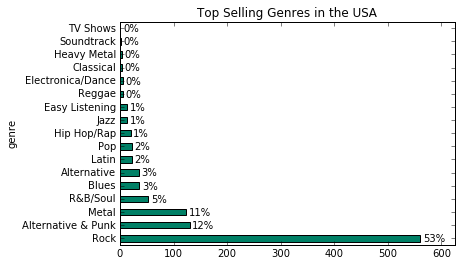

In [11]:
genre_sales_usa = run_query(usa_popular_genre)
genre_sales_usa.set_index("genre", inplace=True, drop=True)

genre_sales_usa["number_tracks_sold"].plot.barh(
    title="Top Selling Genres in the USA",
    xlim=(0, 625),
    colormap=plt.cm.summer
)


for i, label in enumerate(list(genre_sales_usa.index)):
    num_tracks = genre_sales_usa.loc[label, "number_tracks_sold"]
    label = (genre_sales_usa.loc[label, "percent_sold"]
            ).astype(int).astype(str) + "%"
    plt.annotate(str(label), (num_tracks + 5, i - 0.25))

plt.show()

#### Reccomendations:
 - Had to choose 3 out of four albums to add to the store. The genre of the three albums were: Hip-hop, Punk, Pop, and Blues.
 - Looking at the data of the top selling genres, the three albums we should choose are the: Punk, Blues, and Pop albums.
 - We should be on the look out for new Rock albums to add to the store, as that makes up approximately half of our total sales.

### Analyzing Performance of Sales Support Agents

In [12]:
performance = '''
SELECT
    e.first_name || " " || e.last_name employee_name,
    e.hire_date hire_date,
    SUM(i.total) total
FROM employee e
INNER JOIN customer c ON c.support_rep_id = e.employee_id
INNER JOIN invoice i ON i.customer_id = c.customer_id
GROUP BY 1
'''

In [13]:
run_query(performance)

,employee_name,hire_date,total
0,Jane Peacock,2017-04-01 00:00:00,1731.51
1,Margaret Park,2017-05-03 00:00:00,1584.00
2,Steve Johnson,2017-10-17 00:00:00,1393.92


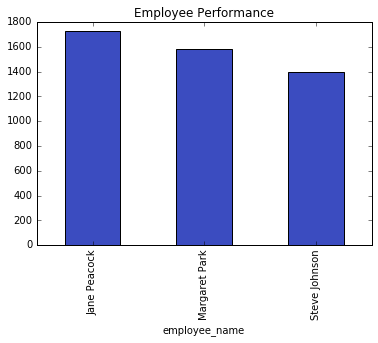

In [14]:
employee_performance = run_query(performance)
employee_performance.set_index("employee_name", inplace=True)

employee_performance["total"].plot.bar(
    title="Employee Performance",
    xlim=(0, 4),
    colormap=plt.cm.coolwarm
)

plt.show()

#### Observations
 - Jane Peacock is the highest performing employee, with an approx. 21% differece from her to their lowest performing employee
 - However, Jane was also brought on earlier than Steve, which could account for this difference in totals

### Sales Data by Country

In [15]:
# total number of customers, total value of sales,
# average value of sales per customer, average order value

sales_by_country = '''
WITH country_or_other AS
    (
     SELECT
       CASE
           WHEN (
                 SELECT count(*)
                 FROM customer
                 where country = c.country
                ) = 1 THEN "Other"
           ELSE c.country
       END AS country,
       c.customer_id,
       i.*
     FROM invoice i
     INNER JOIN customer c ON c.customer_id = i.customer_id
    )
    
SELECT 
    country,
    number_customers,
    total,
    avg_sale_per_cust,
    avg_amt_per_order
FROM(
    SELECT
        co.country country,
        COUNT(DISTINCT(co.customer_id)) number_customers,
        SUM(i.total) total,
        SUM(i.total) / COUNT(DISTINCT(co.customer_id)) avg_sale_per_cust,
        SUM(i.total) / COUNT(DISTINCT(i.invoice_id)) avg_amt_per_order,
        CASE
            WHEN
                country = "Other" THEN 1
                ELSE 0
            END AS sort
    FROM country_or_other co
    INNER JOIN invoice i ON i.customer_id = co.customer_id
    GROUP BY 1
    ORDER BY sort)
;
'''

In [16]:
run_query(sales_by_country)

,country,number_customers,total,avg_sale_per_cust,avg_amt_per_order
0,Brazil,5,5341.05,1068.210000,87.558197
1,Canada,8,5291.55,661.443750,69.625658
2,Czech Republic,2,4146.12,2073.060000,138.204000
3,France,5,3921.39,784.278000,78.427800
4,Germany,4,3440.25,860.062500,83.908537
5,India,2,2024.55,1012.275000,96.407143
6,Portugal,2,2653.20,1326.600000,91.489655
7,USA,13,10650.42,819.263077,81.300916
8,United Kingdom,3,2337.39,779.130000,83.478214
9,Other,15,11190.96,746.064000,76.128980


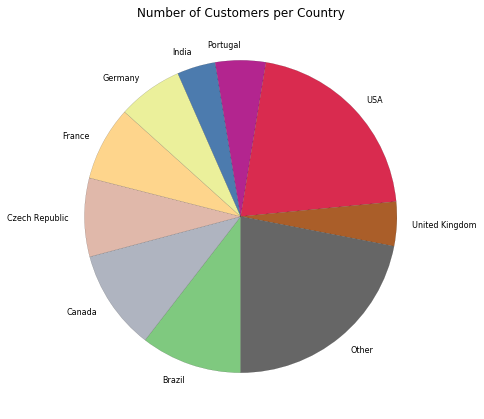

In [17]:
country_metrics = run_query(sales_by_country)
country_metrics.set_index("country", drop=True, inplace=True)

fig= plt.figure(figsize=(7,7))

country_metrics["total"].plot.pie(
    startangle=-90,
    counterclock=False,
    title='Number of Customers per Country',
    colormap=plt.cm.Accent,
    fontsize=8,
    wedgeprops={'linewidth':.1}
    )
plt.ylabel(" ")


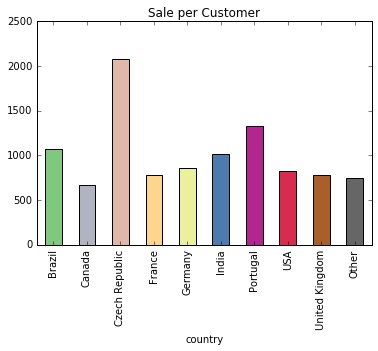

In [18]:
import numpy as np

country_metrics["avg_sale_per_cust"].plot.bar(
    title="Sale per Customer",
    color= [plt.cm.Accent(i) for i in np.linspace(0, 1, country_metrics.shape[0])]
)

plt.show()

 - There appear to be big opportunties for growth in the Czech Republic, based on the average sale per customer
 - Portugal could present a good growth opportunity, but has a small amount of customers
 - Brazil could be a good option, based on average sale per customer and number of customers

### Purchase of Albums vs Tracks

In [41]:
album_purchase = '''

/*selects first track from invoice*/
WITH first_track AS
    (
     SELECT
         il.invoice_id invoice_id,
         MIN(il.track_id) first_track_id
     FROM invoice_line il
     GROUP BY 1
    )
    
SELECT
    album_purchase,
    COUNT(invoice_id) number_of_invoices,
    CAST(count(invoice_id) AS FLOAT) / (
                                         SELECT COUNT(*) FROM invoice
                                      ) percent_purchased
FROM
    (
    SELECT
        ft.*,
        CASE
            WHEN
            /*finds all tracks belonging to an album*/
                 ( 
                  SELECT t.track_id FROM track t
                  WHERE t.album_id = ( /*finds album id from first_track view*/
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ft.first_track_id
                                     ) 

                  EXCEPT 
                  
                /*All tracks contained on an invoice*/
                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ft.invoice_id
                 ) IS NULL
             
             AND 
             /*Same as above, accounting for other combination case of EXCEPT statemnet*/
                 (
                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ft.invoice_id

                  EXCEPT 

                  SELECT t.track_id FROM track t
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ft.first_track_id
                                     ) 
                 ) IS NULL
             THEN "yes"
             ELSE "no"
         END AS "album_purchase"
     FROM first_track ft
    )
GROUP BY album_purchase;
'''

In [42]:
run_query(album_purchase)

,album_purchase,number_of_invoices,percent_purchased
0,no,500,0.814332
1,yes,114,0.185668


 - Album sales make up a bit less than one fifth of the revenue. The Chinook store could potentially stop buying full albums, 